<a href="https://colab.research.google.com/github/nirjhar-das/Activated_Machines/blob/master/Expt_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


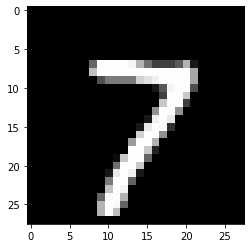

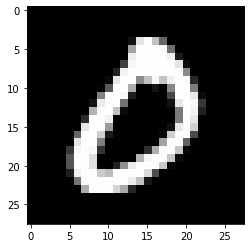

In [ ]:
for i in range(2):
  plt.imshow(X_train[np.random.randint(0, 60000), :, :], cmap='Greys_r')
  plt.show()

In [3]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print(X_train.shape)

(60000, 28, 28, 1)


In [4]:
X_train = X_train/255.0

In [ ]:
inputs = tf.keras.Input(shape=(28, 28, 1))
A = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu')(inputs)
A = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(A)
A = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(A)
A = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(A)
A = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu')(A)
A = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(A)
A = tf.keras.layers.Flatten()(A)
A = tf.keras.layers.Dense(128, activation='relu')(A)
output = tf.keras.layers.Dense(10, activation='relu')(A)

In [ ]:
model = tf.keras.Model(inputs=inputs, outputs= output, name='MNIST_Model1')
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()

Model: "MNIST_Model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 18, 18, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 128)      

In [ ]:
history1 = model.fit(x=X_train, y=Y_train, batch_size=2048, epochs=15, validation_split=0.25, verbose=2)

Epoch 1/15
22/22 - 7s - loss: 1.9933 - accuracy: 0.3088 - val_loss: 1.6902 - val_accuracy: 0.4641
Epoch 2/15
22/22 - 7s - loss: 1.3653 - accuracy: 0.5789 - val_loss: 1.1987 - val_accuracy: 0.6257
Epoch 3/15
22/22 - 7s - loss: 1.1096 - accuracy: 0.6528 - val_loss: 1.0825 - val_accuracy: 0.6643
Epoch 4/15
22/22 - 7s - loss: 1.0351 - accuracy: 0.6734 - val_loss: 1.0152 - val_accuracy: 0.6817
Epoch 5/15
22/22 - 7s - loss: 0.9963 - accuracy: 0.6834 - val_loss: 0.9880 - val_accuracy: 0.6855
Epoch 6/15
22/22 - 7s - loss: 0.9801 - accuracy: 0.6876 - val_loss: 0.9786 - val_accuracy: 0.6847
Epoch 7/15
22/22 - 7s - loss: 0.9722 - accuracy: 0.6892 - val_loss: 0.9707 - val_accuracy: 0.6873
Epoch 8/15
22/22 - 7s - loss: 0.9651 - accuracy: 0.6904 - val_loss: 0.9680 - val_accuracy: 0.6879
Epoch 9/15
22/22 - 7s - loss: 0.9656 - accuracy: 0.6910 - val_loss: 0.9838 - val_accuracy: 0.6860
Epoch 10/15
22/22 - 7s - loss: 0.9628 - accuracy: 0.6916 - val_loss: 0.9557 - val_accuracy: 0.6931
Epoch 11/15
22/22 -

In [5]:
def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])


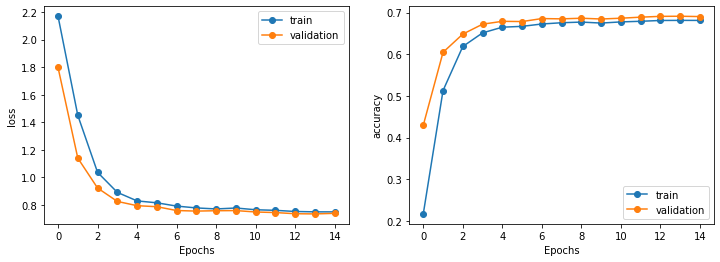

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history1, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history1, 'accuracy','val_accuracy')

In [6]:
class TestActivation(tf.keras.layers.Layer):
  def __init__(self, Lambda = 0.5):
    self.L = tf.Variable(Lambda, dtype='float32', trainable=True)
    super(TestActivation, self).__init__()

  def call(self, inputs):
    A = self.L*tf.nn.relu(inputs) + (1 - self.L)*tf.nn.tanh(inputs)
    return A


In [18]:
init_val = np.random.uniform(low=0.0000001, high=1.0, size=8)
T = [TestActivation(init_val[i]) for i in range(8)]

In [19]:
for i in init_val:
  print(i)

0.13698217415249042
0.4117013862300447
0.9850103916941181
0.9351841391401383
0.06778966844575167
0.8767559931100972
0.041266794809882656
0.10928308077653308


In [20]:
inputs1 = tf.keras.Input(shape=(28, 28, 1))
B = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1))(inputs1)
B = T[0](B)
B = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1))(B)
B = T[1](B)
B = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(B)
B = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1))(B)
B = T[2](B)
B = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1))(B)
B = T[3](B)
B = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(B)
B = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1))(B)
B = T[4](B)
B = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1))(B)
B = T[5](B)
B = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(B)
B = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1))(B)
B = T[6](B)
B = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1))(B)
B = tf.keras.layers.Flatten()(B)
B = tf.keras.layers.Dense(128)(B)
B = T[7](B)
output1 = tf.keras.layers.Dense(10, activation='relu')(B)


In [21]:
model2 = tf.keras.Model(inputs=inputs1, outputs= output1, name='MNIST_Model2')
model2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer= 'adam', metrics=['accuracy'])
model2.summary()

Model: "MNIST_Model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
test_activation_8 (TestActiv (None, 24, 24, 16)        1         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
test_activation_9 (TestActiv (None, 22, 22, 32)        1         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 18, 18, 64)       

In [22]:
history2 = model2.fit(x=X_train, y=Y_train, batch_size=2048, epochs=15, validation_split=0.25, verbose=2)

Epoch 1/15
22/22 - 18s - loss: 1.4701 - accuracy: 0.4924 - val_loss: 0.5187 - val_accuracy: 0.8275
Epoch 2/15
22/22 - 18s - loss: 0.3066 - accuracy: 0.9061 - val_loss: 0.1766 - val_accuracy: 0.9455
Epoch 3/15
22/22 - 18s - loss: 0.1411 - accuracy: 0.9569 - val_loss: 0.1192 - val_accuracy: 0.9629
Epoch 4/15
22/22 - 18s - loss: 0.0987 - accuracy: 0.9696 - val_loss: 0.0861 - val_accuracy: 0.9735
Epoch 5/15
22/22 - 18s - loss: 0.0697 - accuracy: 0.9792 - val_loss: 0.0691 - val_accuracy: 0.9785
Epoch 6/15
22/22 - 18s - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0582 - val_accuracy: 0.9829
Epoch 7/15
22/22 - 18s - loss: 0.0446 - accuracy: 0.9864 - val_loss: 0.0517 - val_accuracy: 0.9841
Epoch 8/15
22/22 - 18s - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0470 - val_accuracy: 0.9860
Epoch 9/15
22/22 - 18s - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0459 - val_accuracy: 0.9867
Epoch 10/15
22/22 - 18s - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0460 - val_accuracy: 0.9867
Epoch 11/

In [23]:
for t in T :
  print(t.L)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.11233873>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.3947802>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9747885>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9302418>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.031054838>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.856868>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.019159393>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.12085069>


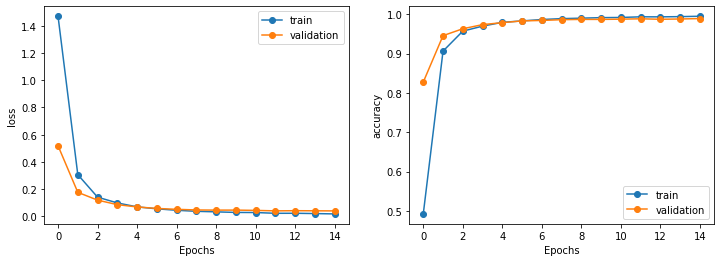

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history2, 'loss','val_loss')
plt.subplot(1,2,2)
plot_train_history(history2, 'accuracy','val_accuracy')

In [14]:
X_test = X_test/255.0

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
Y_pred = model.predict(x=X_test)
Y_label = np.argmax(Y_pred, axis=1)
acc_generic = accuracy_score(Y_test, Y_label)
print(acc_generic)

NameError: ignored

In [25]:
Y_pred_cus = model2.predict(x=X_test)
Y_label_cus = np.argmax(Y_pred_cus, axis=1)
acc_cus = accuracy_score(Y_test, Y_label_cus)
print(acc_cus)

0.9918
